In [1]:
%reload_ext autoreload
%autoreload 3

import warnings
import re
import sys
import os
import glob
import pandas
import time
import pathlib
from shutil import rmtree

sys.path.append("G:\Outros computadores\Meu computador\github\circadipy\src")
import chrono_reader as chr
import chrono_plotter as chp
import chrono_rithm as chrt

PyMICE library v. 1.2.1

The library is available under GPL3 license; we ask that reference to our paper
as well as to the library itself is provided in any published research making
use of PyMICE. Please run:

>>> print(pm.__REFERENCING__)

for more information (given that the library is imported as `pm`).




In [22]:
root_folder = "G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1"
data_folder = root_folder + "\\data\\data_unwrapped"
results_folder = root_folder + "\\results_without_norm"
files = glob.glob(data_folder + "\\*.zip")

files = sorted(files)

print(data_folder)
print(files)

G:\Outros computadores\Meu computador\university\doctorade\future_care\chronobiology\protocols\intellicage_exp_1\data\data_unwrapped
['G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\2022-06-03 17.46.02.zip', 'G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\2022-06-15 20.36.47.zip', 'G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\2022-06-24 14.36.17.zip', 'G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\2022-07-04 10.29.47.zip', 'G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\2022-07-14 18.54.19.zip', 'G:\\Outros

In [ ]:
chr.intellicage_unwrapper(files, 'data', '30T')

In [23]:
individual_files = glob.glob(data_folder + "\\*.txt")
print(individual_files)

['G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\data_animal_1.txt', 'G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\data_animal_10.txt', 'G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\data_animal_11.txt', 'G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\data_animal_12.txt', 'G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\data_animal_13.txt', 'G:\\Outros computadores\\Meu computador\\university\\doctorade\\future_care\\chronobiology\\protocols\\intellicage_exp_1\\data\\data_unwrapped\\data_animal_14.txt', 'G:\

In [24]:
zt_0_time = 20
#labels_dict = {'cycle_types': ['LD', 'DD', 'DD', 'LD'], 'test_labels': ['1_control_dl', '2_control_dd', '3_hypo_dd', '4_hypo_dl'], 'cycle_days': [7, 29, 43, 13]}
labels_dict = {'cycle_types': ['LD', 'DD', 'DD', 'DD', 'LD'], 'test_labels': ['1_control_dl', '2_control_dd', '3_induction_dd', '4_hypo_dd', '5_hypo_dl'], 'cycle_days': [13, 29, 23, 20, 12]}
type = 'intellicage'

animals = {}
for file in individual_files:
    expression = r"unwrapped\\data_(.*?)\.txt"
    name = re.search(expression, file)
    name = name.group(1)

    animals[name] = {}
    animals[name]['file'] = file

    protocol = chr.read_protocol(name, file, zt_0_time = zt_0_time, labels_dict = labels_dict, type = type, consider_first_day = False)
    protocol.resample('1H', method = 'sum')
    protocol.apply_filter(window = 3, type = 'moving_average', order = 2, reverse = False)
    #protocol.normalize_data(type = 'minmax', per_day = True)
    protocol.delete_first_days(7)
    protocol.delete_last_days(2)

    animals[name]['protocol'] = protocol

In [25]:
animals['animal_1']['protocol'].data

,values,is_night,cycle_types,test_labels,real_date,day
2022-06-10 00:00:00,3.333333,False,LD,1_control_dl,2022-06-10 20:00:00,2022-06-10
2022-06-10 01:00:00,2.000000,False,LD,1_control_dl,2022-06-10 21:00:00,2022-06-10
2022-06-10 02:00:00,1.000000,False,LD,1_control_dl,2022-06-10 22:00:00,2022-06-10
2022-06-10 03:00:00,0.666667,False,LD,1_control_dl,2022-06-10 23:00:00,2022-06-10
2022-06-10 04:00:00,0.666667,False,LD,1_control_dl,2022-06-11 00:00:00,2022-06-10
...,...,...,...,...,...,...
2022-09-04 19:00:00,2.000000,True,LD,5_hypo_dl,2022-09-05 15:00:00,2022-09-04
2022-09-04 20:00:00,4.666667,True,LD,5_hypo_dl,2022-09-05 16:00:00,2022-09-04
2022-09-04 21:00:00,5.666667,True,LD,5_hypo_dl,2022-09-05 17:00:00,2022-09-04
2022-09-04 22:00:00,6.333333,True,LD,5_hypo_dl,2022-09-05 18:00:00,2022-09-04


In [26]:
reset = False

def reset_folder(folder):
    for root, dirs, files in os.walk(folder):
        for f in files:
            os.unlink(os.path.join(root, f))
        for d in dirs:
            rmtree(os.path.join(root, d))

if results_folder.split("\\")[-1] not in os.listdir(root_folder):
    os.mkdir(results_folder)
    print("Folder results created!")

for count, key in enumerate(list(animals.keys())):
    animals[key]['save_folder'] = results_folder + '\\' + key
    if key not in os.listdir(results_folder):
        os.mkdir(results_folder + '\\' + key)
        print("Folder " + key + " created!")
    elif key in os.listdir(results_folder) and reset == True:
        reset_folder(results_folder + '\\' + key)
        print("Folder " + key + " cleaned!")
    else:
        print("Folder " + key + " already exists!")

Folder animal_1 already exists!
Folder animal_10 already exists!
Folder animal_11 already exists!
Folder animal_12 already exists!
Folder animal_13 already exists!
Folder animal_14 already exists!
Folder animal_15 already exists!
Folder animal_16 already exists!
Folder animal_17 already exists!
Folder animal_18 already exists!
Folder animal_19 already exists!
Folder animal_2 already exists!
Folder animal_20 already exists!
Folder animal_21 already exists!
Folder animal_22 already exists!
Folder animal_23 already exists!
Folder animal_24 already exists!
Folder animal_3 already exists!
Folder animal_4 already exists!
Folder animal_5 already exists!
Folder animal_6 already exists!
Folder animal_7 already exists!
Folder animal_8 already exists!
Folder animal_9 already exists!


In [21]:
for animal in animals:
    chp.actogram_bar(animals[animal]['protocol'], first_hour = 18, save_folder = animals[animal]['save_folder'], save_suffix = 'bar')
    chp.actogram_colormap(animals[animal]['protocol'], first_hour = 18, save_folder = animals[animal]['save_folder'], save_suffix = 'colormap')
    chp.data_periodogram(animals[animal]['protocol'], time_shape = 'continuous', method = 'periodogram', max_period = 48, unit_of_measurement = '°C', save_folder = animals[animal]['save_folder'], save_suffix = 'periodogram')
    chp.data_periodogram(animals[animal]['protocol'], time_shape = 'continuous', method = 'welch', max_period = 48, unit_of_measurement = '°C', save_folder = animals[animal]['save_folder'], save_suffix = 'welch')

    print(animal.replace('_', ' ').capitalize() + ' actograms saved!')

Animal 1 actograms saved!
Animal 10 actograms saved!
Animal 11 actograms saved!
Animal 12 actograms saved!
Animal 13 actograms saved!
Animal 14 actograms saved!
Animal 15 actograms saved!
Animal 16 actograms saved!
Animal 17 actograms saved!
Animal 18 actograms saved!
Animal 19 actograms saved!
Animal 2 actograms saved!
Animal 20 actograms saved!
Animal 21 actograms saved!
Animal 22 actograms saved!
Animal 23 actograms saved!
Animal 24 actograms saved!
Animal 3 actograms saved!
Animal 4 actograms saved!
Animal 5 actograms saved!
Animal 6 actograms saved!
Animal 7 actograms saved!
Animal 8 actograms saved!
Animal 9 actograms saved!


In [30]:
for count, animal in enumerate(animals):
    init = time.time()

    save_folder = animals[animal]['save_folder']
    chrt.total_activity_per_day(animals[animal]['protocol'], save_folder = save_folder, save_suffix = '')

    end = time.time() - init

    print(animal.replace('_', ' ').capitalize() + ' total activity per day saved! (' + str(round(end, 2)) + ' seconds)')
    

Animal 1 total activity per day saved! (0.08 seconds)
Animal 10 total activity per day saved! (0.08 seconds)
Animal 11 total activity per day saved! (0.08 seconds)
Animal 12 total activity per day saved! (0.1 seconds)
Animal 13 total activity per day saved! (0.08 seconds)
Animal 14 total activity per day saved! (0.08 seconds)
Animal 15 total activity per day saved! (0.07 seconds)
Animal 16 total activity per day saved! (0.06 seconds)
Animal 17 total activity per day saved! (0.06 seconds)
Animal 18 total activity per day saved! (0.06 seconds)
Animal 19 total activity per day saved! (0.07 seconds)
Animal 2 total activity per day saved! (0.05 seconds)
Animal 20 total activity per day saved! (0.05 seconds)
Animal 21 total activity per day saved! (0.08 seconds)
Animal 22 total activity per day saved! (0.09 seconds)
Animal 23 total activity per day saved! (0.07 seconds)
Animal 24 total activity per day saved! (0.12 seconds)
Animal 3 total activity per day saved! (0.08 seconds)
Animal 4 total

In [19]:
dict = {'time_shape': 'continuous', 
        'step': 0.01, 
        'start_time': 22, 
        'end_time': 26, 
        'n_components': [1]}

best_models = []

for count, animal in enumerate(animals):
    init = time.time()

    save_folder = animals[animal]['save_folder']

    best_models, best_models_file = chrt.fit_cosinor(animals[animal]['protocol'], dict = dict, save_folder = save_folder)
    best_models_fixed, best_models_fixed_file = chrt.fit_cosinor_fixed_period(animals[animal]['protocol'], best_models, save_folder = save_folder)    
    animals[animal]['best_models'] = best_models
    animals[animal]['best_models_file'] = best_models_file
    animals[animal]['best_models_fixed'] = best_models_fixed
    animals[animal]['best_models_fixed_file'] = best_models_fixed_file     

    end = time.time() - init

    print("Cosinor fitted to " + animal.replace('_', ' ') + " and results saved!")
    print("Time elapsed: " + "{:.2f}".format(end) + " seconds")

Cosinor fitted to animal 1 and results saved!
Time elapsed: 134.80 seconds
Cosinor fitted to animal 10 and results saved!
Time elapsed: 137.55 seconds
Cosinor fitted to animal 11 and results saved!
Time elapsed: 72.73 seconds
Cosinor fitted to animal 12 and results saved!
Time elapsed: 72.54 seconds
Cosinor fitted to animal 13 and results saved!
Time elapsed: 125.61 seconds
Cosinor fitted to animal 14 and results saved!
Time elapsed: 62.02 seconds
Cosinor fitted to animal 15 and results saved!
Time elapsed: 71.00 seconds
Cosinor fitted to animal 16 and results saved!
Time elapsed: 71.54 seconds
Cosinor fitted to animal 17 and results saved!
Time elapsed: 102.08 seconds
Cosinor fitted to animal 18 and results saved!
Time elapsed: 57.22 seconds
Cosinor fitted to animal 19 and results saved!
Time elapsed: 56.37 seconds
Cosinor fitted to animal 2 and results saved!
Time elapsed: 69.30 seconds
Cosinor fitted to animal 20 and results saved!
Time elapsed: 97.09 seconds
Cosinor fitted to anima

In [20]:
for count, animal in enumerate(animals):
    init = time.time()
    
    save_folder = animals[animal]['save_folder']

    chp.model_overview_detailed(animals[animal]['protocol'], animals[animal]['best_models_fixed'], save_folder = save_folder)
    chp.model_overview(animals[animal]['protocol'], animals[animal]['best_models'], save_folder = save_folder)
    chp.model_over_signal(animals[animal]['protocol'], animals[animal]['best_models'], position = 'head', mv_avg_window = 1, save_folder = save_folder)

    end = time.time() - init

    print("Cosinor overview " + animal.replace('_', ' ') + " saved!")
    print("Time elapsed: " + "{:.2f}".format(end) + " seconds")

Cosinor overview animal 1 saved!
Time elapsed: 2.38 seconds
Cosinor overview animal 10 saved!
Time elapsed: 2.11 seconds
Cosinor overview animal 11 saved!
Time elapsed: 2.15 seconds
Cosinor overview animal 12 saved!
Time elapsed: 2.07 seconds
Cosinor overview animal 13 saved!
Time elapsed: 2.32 seconds
Cosinor overview animal 14 saved!
Time elapsed: 2.83 seconds
Cosinor overview animal 15 saved!
Time elapsed: 2.19 seconds
Cosinor overview animal 16 saved!
Time elapsed: 2.12 seconds
Cosinor overview animal 17 saved!
Time elapsed: 3.08 seconds
Cosinor overview animal 18 saved!
Time elapsed: 2.53 seconds
Cosinor overview animal 19 saved!
Time elapsed: 2.11 seconds
Cosinor overview animal 2 saved!
Time elapsed: 2.06 seconds
Cosinor overview animal 20 saved!
Time elapsed: 2.40 seconds
Cosinor overview animal 21 saved!
Time elapsed: 2.35 seconds
Cosinor overview animal 22 saved!
Time elapsed: 2.12 seconds
Cosinor overview animal 23 saved!
Time elapsed: 2.05 seconds
Cosinor overview animal 24

Cosinor fitted to animal 1 and results saved!
Time elapsed: 115.40 seconds
Cosinor fitted to animal 10 and results saved!
Time elapsed: 66.85 seconds
Cosinor fitted to animal 11 and results saved!
Time elapsed: 62.71 seconds
Cosinor fitted to animal 12 and results saved!
Time elapsed: 66.69 seconds
Cosinor fitted to animal 13 and results saved!
Time elapsed: 116.67 seconds
Cosinor fitted to animal 14 and results saved!
Time elapsed: 63.39 seconds
Cosinor fitted to animal 15 and results saved!
Time elapsed: 70.32 seconds
Cosinor fitted to animal 16 and results saved!
Time elapsed: 70.09 seconds


KeyError: 'CI(acrophase)'

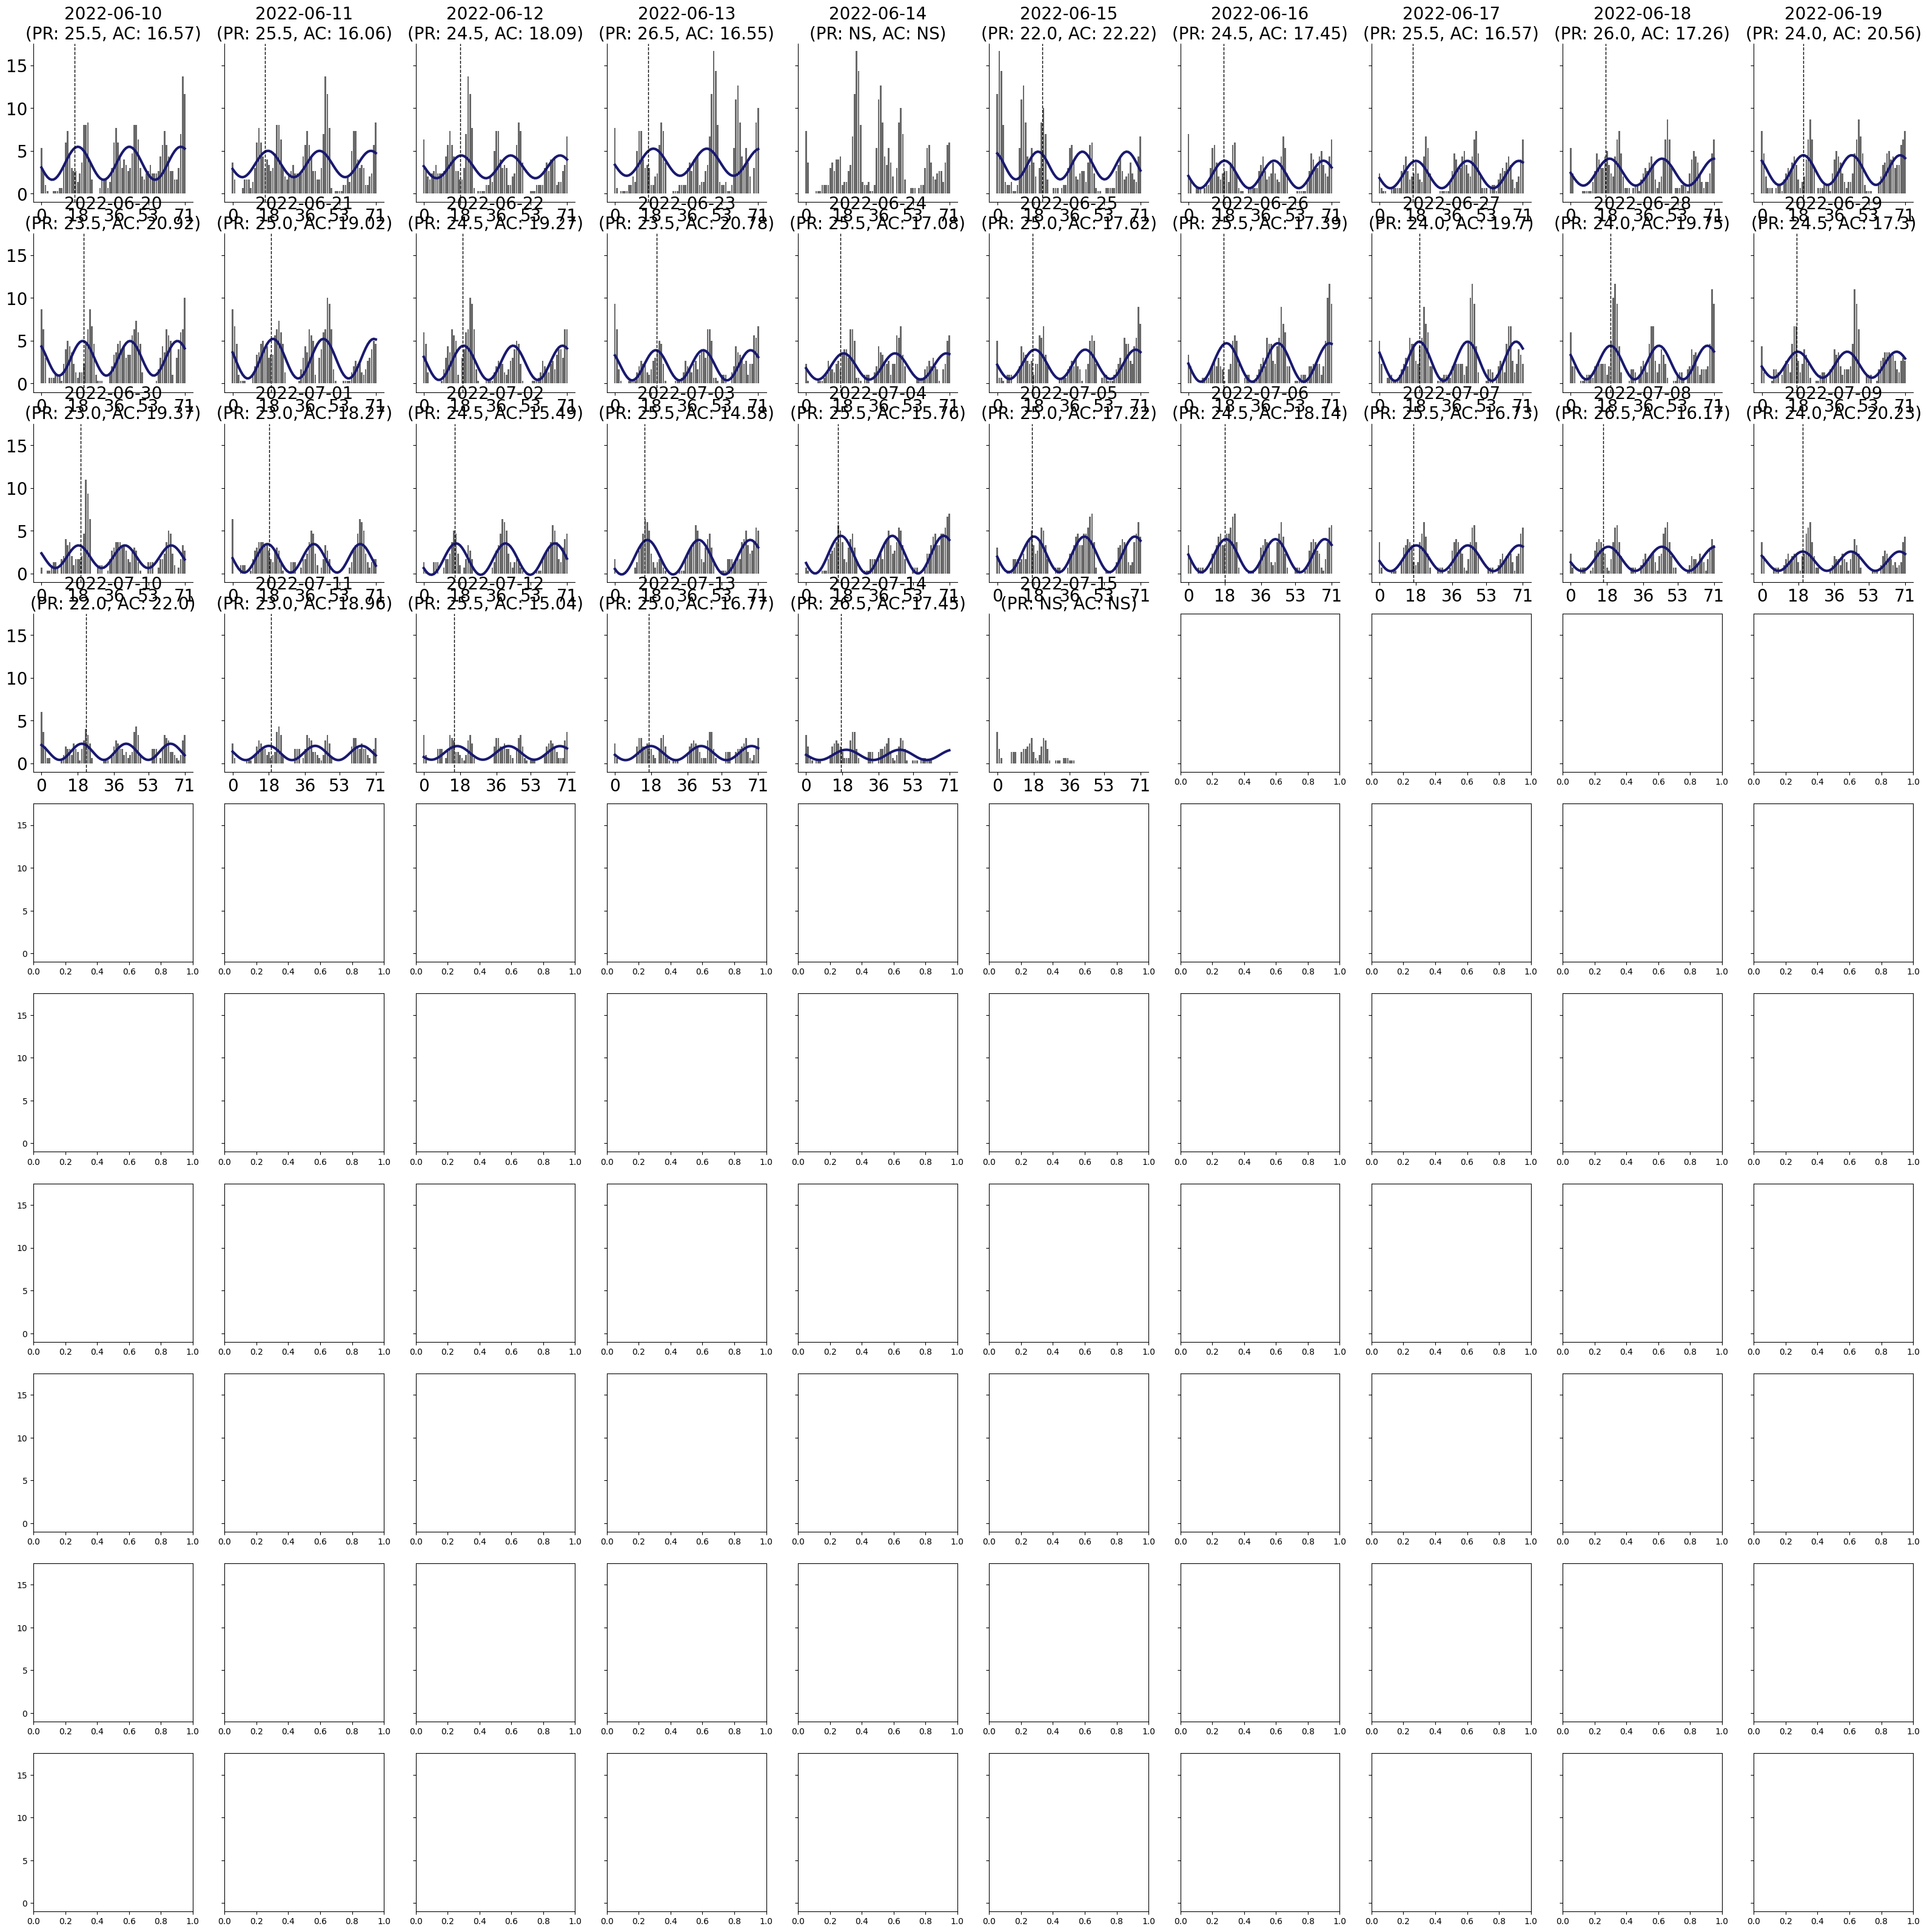

In [33]:
dict = {'day_window': 3, 
        'step': 0.5, 
        'start_time': 22, 
        'end_time': 27, 
        'n_components': [1]}

best_models = []

for count, animal in enumerate(animals):
    init = time.time()

    save_folder = animals[animal]['save_folder']

    best_models_per_day, best_models_fixed_file = chrt.fit_cosinor_per_day(animals[animal]['protocol'], dict = dict, plot = True, save_folder = save_folder)    
    animals[animal]['best_models_per_day'] = best_models_per_day
    animals[animal]['best_models_file_per_day'] = best_models_fixed_file

    end = time.time() - init

    print("Cosinor fitted to " + animal.replace('_', ' ') + " and results saved!")
    print("Time elapsed: " + "{:.2f}".format(end) + " seconds")